# Feature Engineering for Machine Learning

##### Chaper 1: Summary

This chapter discussed a number of common numeric feature engineering techniques, such as 
+ quantization, scaling (a.k.a. normalization),
+log transforms (a type of power transform), 
+ and interaction features.

It gives a brief summary of feature selection techniques, necessary for handling large quantities of interaction features. In statistical machine learning, all data eventually boils down to numeric features. Therefore, all roads lead to some kind of numeric feature engineering technique at the end. Keep these tools handy for the end game of feature engineering!

# Fancy Tricks with Simple Numbers

### Dealing with Counts


### 1. Binarization
+ If you have large number ranges in feature, a more robust representation of user preference is to binarize the count and clip all counts greater than 1 to 1. The binary target is a simple and robust measure of user preference.

##### Must collect the Million Song Dataset from http://millionsongdataset.com/tasteprofile/

### 2. Quantization or Binning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Import Ubaar Dataset
df = pd.read_csv('train.csv')

Text(0, 0.5, 'distanceKM')

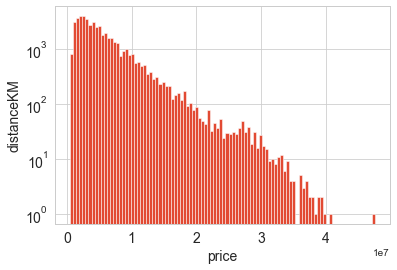

In [3]:
# Plot the histogram of the price
sns.set_style('whitegrid')
fig, ax = plt.subplots()
df['price'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('price', fontsize=14)
ax.set_ylabel('distanceKM', fontsize=14)

### (a) Fixed-width Binning
+ Each bin contains a specific numeric range. Examples (1-10) or (11-20) or (21-30).

In [4]:
price_counts = df['price']
price_counts


0        15300000
1         1800000
2         3742000
3         1300000
4         8870000
           ...   
49995     6360000
49996     3255000
49997     6500000
49998     2600000
49999     5230000
Name: price, Length: 50000, dtype: int64

In [5]:
np.floor(np.log10(price_counts))

0        7.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
49995    6.0
49996    6.0
49997    6.0
49998    6.0
49999    6.0
Name: price, Length: 50000, dtype: float64

### (b) Quantile Binning

+ Fixed-width binning is easy to compute. But if there are large gaps in the counts, then there will be many empty bins with no data. This problem can be solved by adaptively positioning the bins based on the distribution of the data. This can be done using the quantiles of the distribution.

In [6]:
deciles = df['price'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     1595900.0
0.2     2200000.0
0.3     2800000.0
0.4     3500000.0
0.5     4307500.0
0.6     5275000.0
0.7     6560000.0
0.8     8400000.0
0.9    11500000.0
Name: price, dtype: float64

Text(0, 0.5, 'distanceKM')

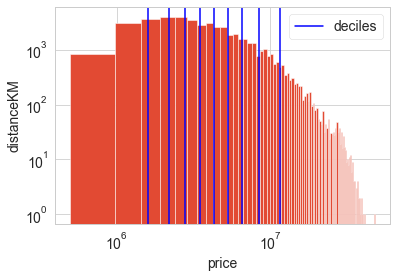

In [7]:
# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
df['price'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='blue')
ax.legend([handle], ['deciles'], fontsize=14) 
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('price', fontsize=14) 
ax.set_ylabel('distanceKM', fontsize=14)

 (i) Binning counts by quantiles

In [8]:
# Map the counts to quartiles
import pandas as pd
pd.qcut(price_counts, 4, labels=False)

0        3
1        0
2        1
3        0
4        3
        ..
49995    2
49996    1
49997    2
49998    1
49999    2
Name: price, Length: 50000, dtype: int64

In [9]:
# Compute the quantiles themselves
large_counts_series = pd.Series(price_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25    2500000.0
0.50    4307500.0
0.75    7400000.0
Name: price, dtype: float64

## Log Transformation

+ The log function is the inverse of the exponential function. It is defined such that log a (a^x) = x, where a is a positive constant, and x can be any positive number.

In [11]:
#log_price_counts

In [13]:
import math 

log_price = np.log10(price_counts)

In [14]:
# See Example

### Log Transformation in Practice 

Using log transformed word counts in the Online News Popularity dataset to predict article popularity

In [19]:
df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ')
# Take the log transform of the 'n_tokens_content' feature, which
# represents the number of words (tokens) in a news article.

df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

# Train two linear regression models to predict the number of shares # of an article, one using the original feature and the other the
# log transformed version.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']],
                              df['shares'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']],
                                 df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))


<ipython-input-19-700c10fb37fb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ')


AttributeError: 'LinearRegression' object has no attribute 'LinearRegression'

Visualizing the correlation between input and output in the news popularity prediction problem

Text(0, 0.5, 'Number of Shares')

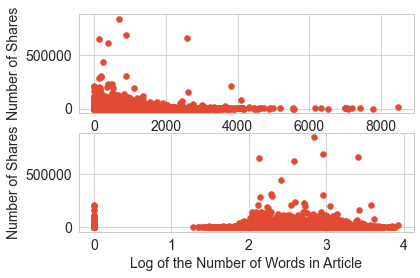

In [20]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14) 
ax1.set_ylabel('Number of Shares', fontsize=14)


ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

### Power Transforms: Generalization of the Log Transform

The log transform is a specific example of a family of transformations known as power transforms. In statistical terms, these are variance-stabilizing transformations.

### Box-Cox Transform:
+ A simple generalization of both the square root transform and the log transform is known as the Box-Cox transform.

+ Formally, A Box cox transformation is defined as a way to transform non-normal dependent variables in our data to a normal shape through which we can run a lot more tests than we could have.

+ Ref: https://www.geeksforgeeks.org/box-cox-transformation-using-python/

/Users/qibili/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/qibili/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.24983925212345937


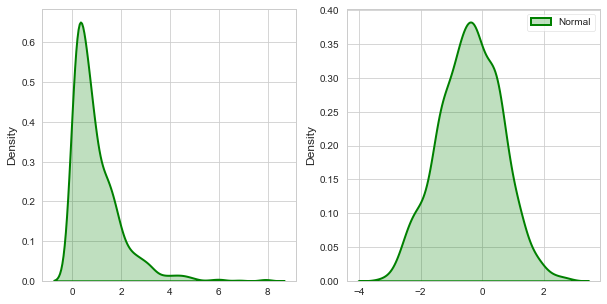

In [21]:
# import modules
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
  
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

## Feature Scaling or Normalization
+ Also known as variance-stabilizing transformations. 

#### Min-Max Scaling
+ Min-max scaling squeezes (or stretches) all feature values to be within the range of [0, 1

#### Standardization (Variance Scaling)
+ It subtracts off the mean of the feature (over all data points) and divides by the var‐ iance. Hence, it can also be called variance scaling. The resulting scaled feature has a mean of 0 and a variance of 1. 

### L2 Normilization (Euclidean norm)
+ This technique normalizes (divides) the original feature value by what’s known as the l2 norm, also known as the Euclidean norm.  

No matter the scaling method, feature scaling always divides the feature by a constant (known as the normalization constant).

#### Feature Scaling Example 

In [24]:
import pandas as pd
import sklearn.preprocessing as preproc
# Load the Online News Popularity dataset
df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ')
# Look at the original data - the number of words in an article 

#df['n_tokens_content'].as_matrix()

# Min-max scaling
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])

<ipython-input-24-febf30730bdb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ')


In [27]:
df['minmax']

# Standardization - note that by definition, some outputs will be negative
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']]) 
df['standardized']

# L2-normalization
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)

df['l2_normalized']


0        0.001524
1        0.001775
2        0.001469
3        0.003696
4        0.007462
           ...   
39639    0.002408
39640    0.002283
39641    0.003077
39642    0.004747
39643    0.001093
Name: l2_normalized, Length: 39644, dtype: float64

### Plotting the histograms of original and scaled data

Text(29.0, 0.5, 'Number of articles')

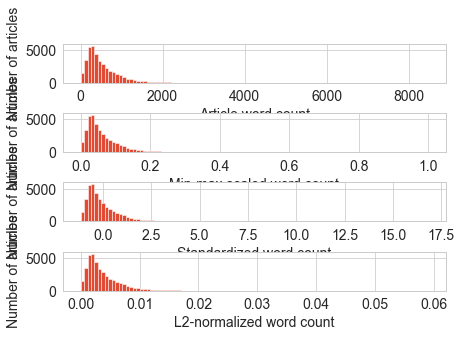

In [28]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)
df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)
df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)
df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

# Interaction Features